# DT Classfier Modelling & Visualization

# Dataset information

In [1]:
import pandas as pd
df = pd.read_csv('Iris.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,11,5.4,3.7,1.5,0.2,Iris-setosa
133,134,6.3,2.8,5.1,1.5,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
94,95,5.6,2.7,4.2,1.3,Iris-versicolor


In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [12]:
df.drop('Id', axis=1, inplace=True)

The `Id` column is insignificant for any data analytics.

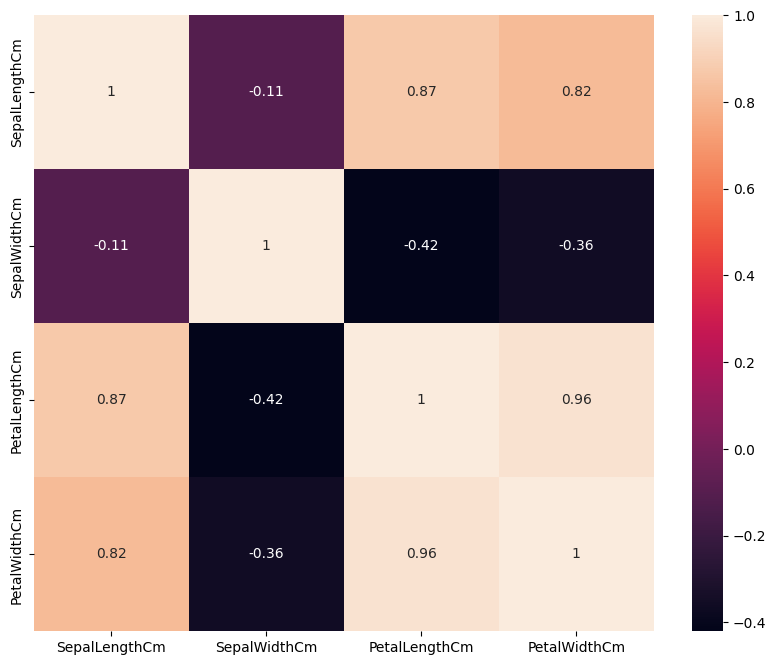

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

<Figure size 1000x800 with 0 Axes>

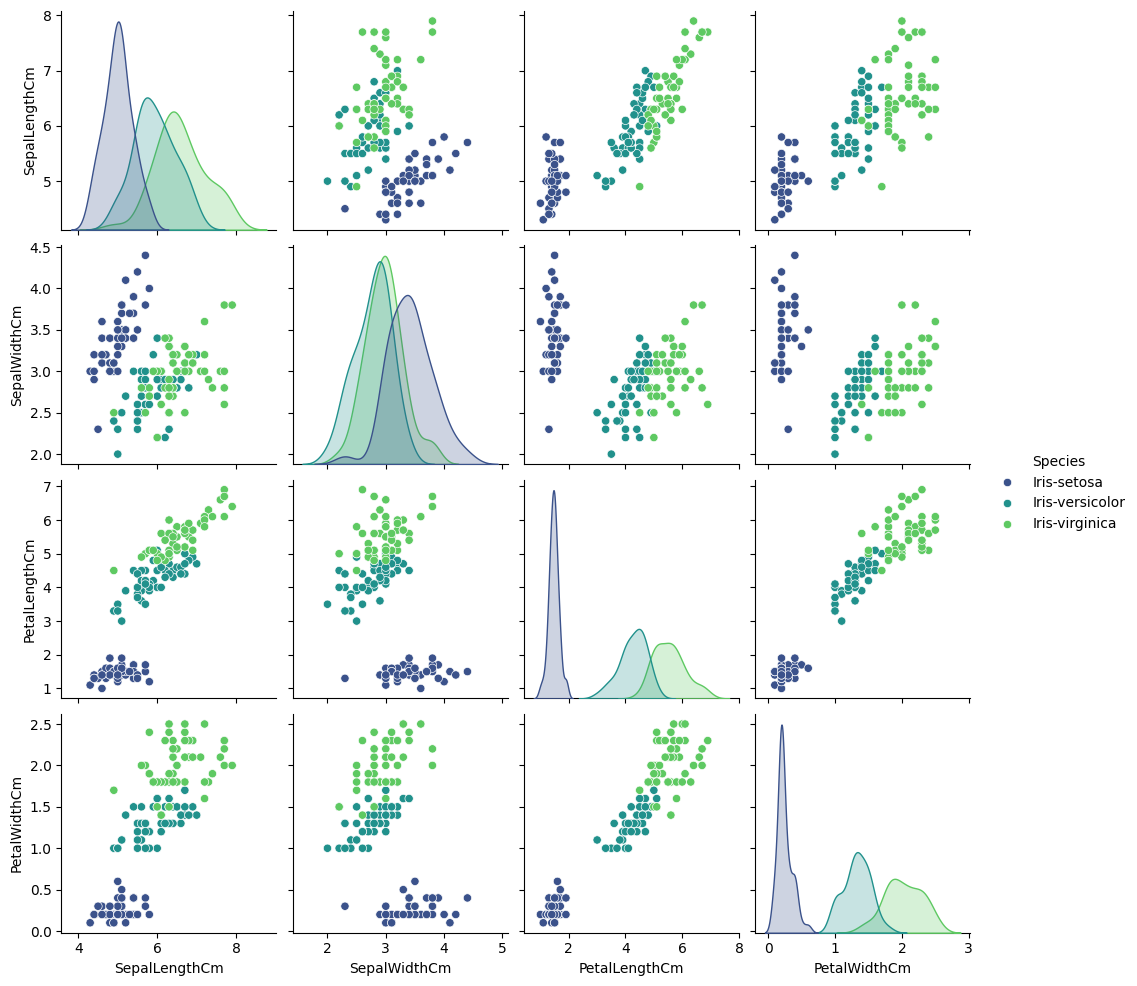

In [14]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Species', palette='viridis')
plt.show()

In [15]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=df[df['Species'] == species]['PetalLengthCm'],
            y=df[df['Species'] == species]['PetalWidthCm'],
            z=df[df['Species'] == species]['SepalLengthCm'],
            mode='markers',
            name=str(species),
            marker=dict(
                size=6,
                color={'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}[species],
                opacity=1,
                line=dict(
                    width=1,
                    color='black'
                )
            )
        ) for species in df['Species'].unique()
    ],
    layout=dict(
                margin=dict(l=0, r=0, b=0, t=0),
                legend=dict(title="Species", x=1, y=0.5, font=dict(size=16)),
                scene=dict(
                    xaxis=dict(title="Petal Length (cm)"),
                    yaxis=dict(title="Petal Width (cm)"),
                    zaxis=dict(title="Sepal Length (cm)")
                ),
                width=1200, height=800
            )
)

fig.show()

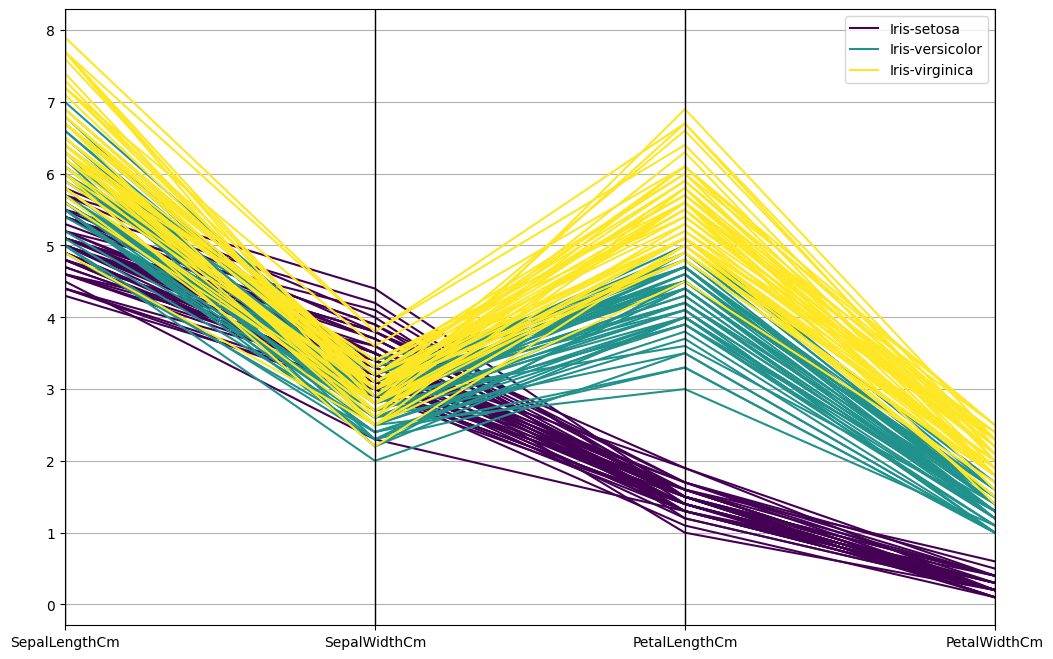

In [16]:
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(df, "Species",colormap='viridis')
plt.show()

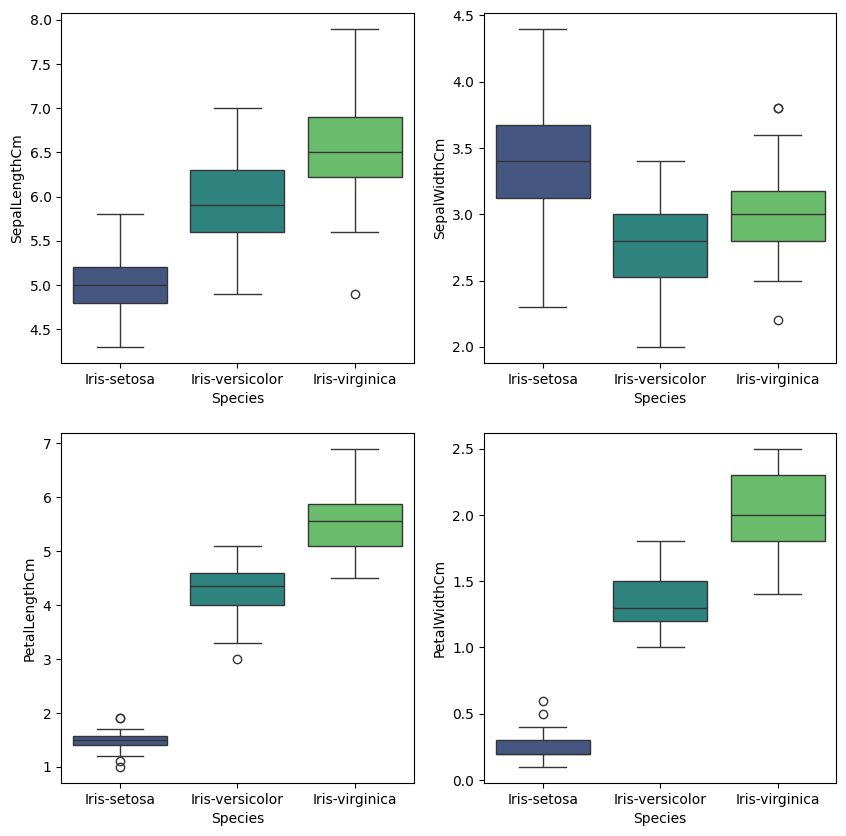

In [17]:
plt.figure(figsize=(10,10))

for i, col in enumerate(df.columns[:-1]): # last element of df.columns is 'Species'
    plt.subplot(2, 2, i+1)
    sns.boxplot(df, x="Species", y=col, hue="Species", palette='viridis')

plt.show()

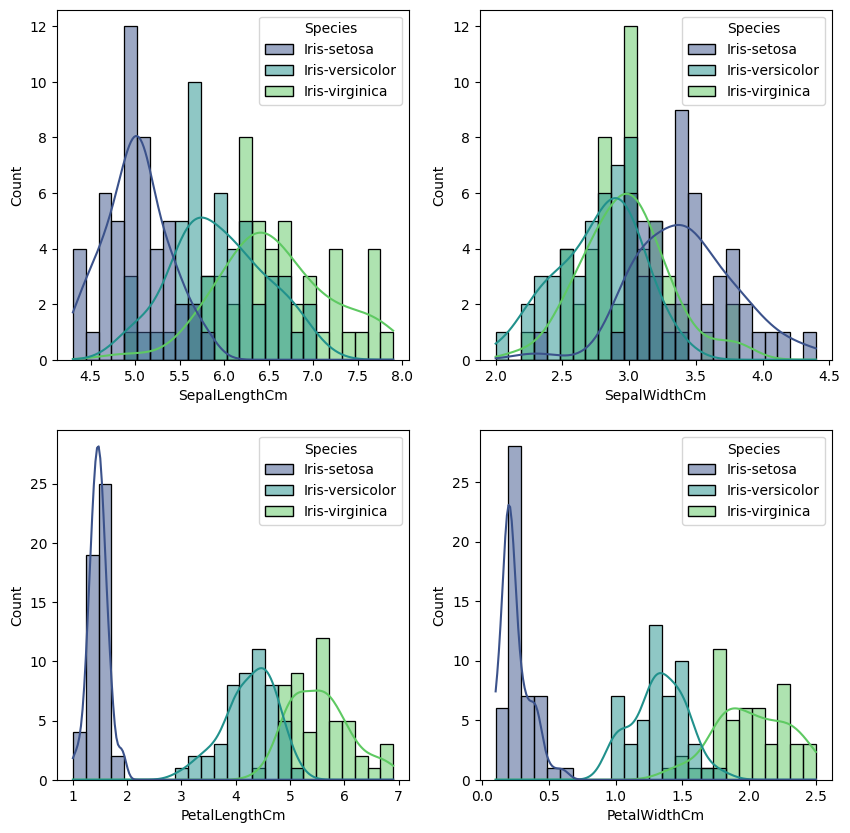

In [18]:
plt.figure(figsize=(10,10))

for i, col in enumerate(df.columns[:-1]): # last element of df.columns is 'Species'
    plt.subplot(2, 2, i+1)
    sns.histplot(df, x=col, hue="Species", palette='viridis', bins=25, kde=True)

plt.show()

# Data Preprocessing

### Train-test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Species', axis=1, inplace=False)
y = df['Species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
140,6.7,3.1,5.6,2.4
97,6.2,2.9,4.3,1.3
65,6.7,3.1,4.4,1.4
148,6.2,3.4,5.4,2.3
46,5.1,3.8,1.6,0.2


In [23]:
X_test.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,6.8,2.8,4.8,1.4
19,5.1,3.8,1.5,0.3
104,6.5,3.0,5.8,2.2
18,5.7,3.8,1.7,0.3
128,6.4,2.8,5.6,2.1


In [24]:
y_train.sample(5)

83     Iris-versicolor
25         Iris-setosa
22         Iris-setosa
133     Iris-virginica
117     Iris-virginica
Name: Species, dtype: object

In [25]:
y_test.sample(5)

128     Iris-virginica
82     Iris-versicolor
118     Iris-virginica
110     Iris-virginica
19         Iris-setosa
Name: Species, dtype: object

### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
for col in X.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [28]:
X_train.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
124,1.085898,0.545515,1.131059,1.222851
4,-0.986349,1.220379,-1.334622,-1.309484
146,0.598311,-1.254122,0.729670,0.956290
102,1.573486,-0.129349,1.245742,1.222851
107,1.817280,-0.354304,1.475108,0.823009


In [29]:
X_test.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
36,-0.376865,0.995425,-1.391963,-1.309484
131,2.548661,1.670289,1.532449,1.089570
31,-0.498762,0.770470,-1.277280,-1.042922
110,0.842104,0.320560,0.787011,1.089570
18,-0.133071,1.670289,-1.162597,-1.176203


### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()
y_train_arr = encoder.fit_transform(y_train)
y_test_arr = encoder.transform(y_test)

In [32]:
y_train_arr

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [33]:
y_test_arr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [34]:
encoder.inverse_transform([0, 1, 2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train_arr)

DecisionTreeClassifier(criterion='entropy')

In [37]:
dtc.score(X_train, y_train_arr)

1.0

In [38]:
dtc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [39]:
accuracy_score(y_test_arr, dtc.predict(X_test))

1.0

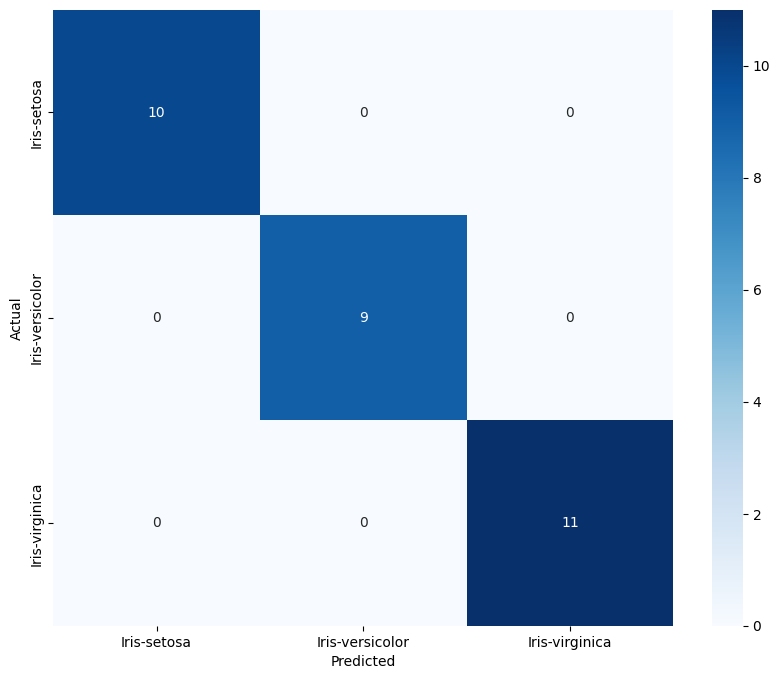

In [47]:
g = confusion_matrix(y_test_arr, dtc.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(g, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5, 2.5], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.yticks([0.5, 1.5, 2.5], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [41]:
print(classification_report(y_test_arr, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



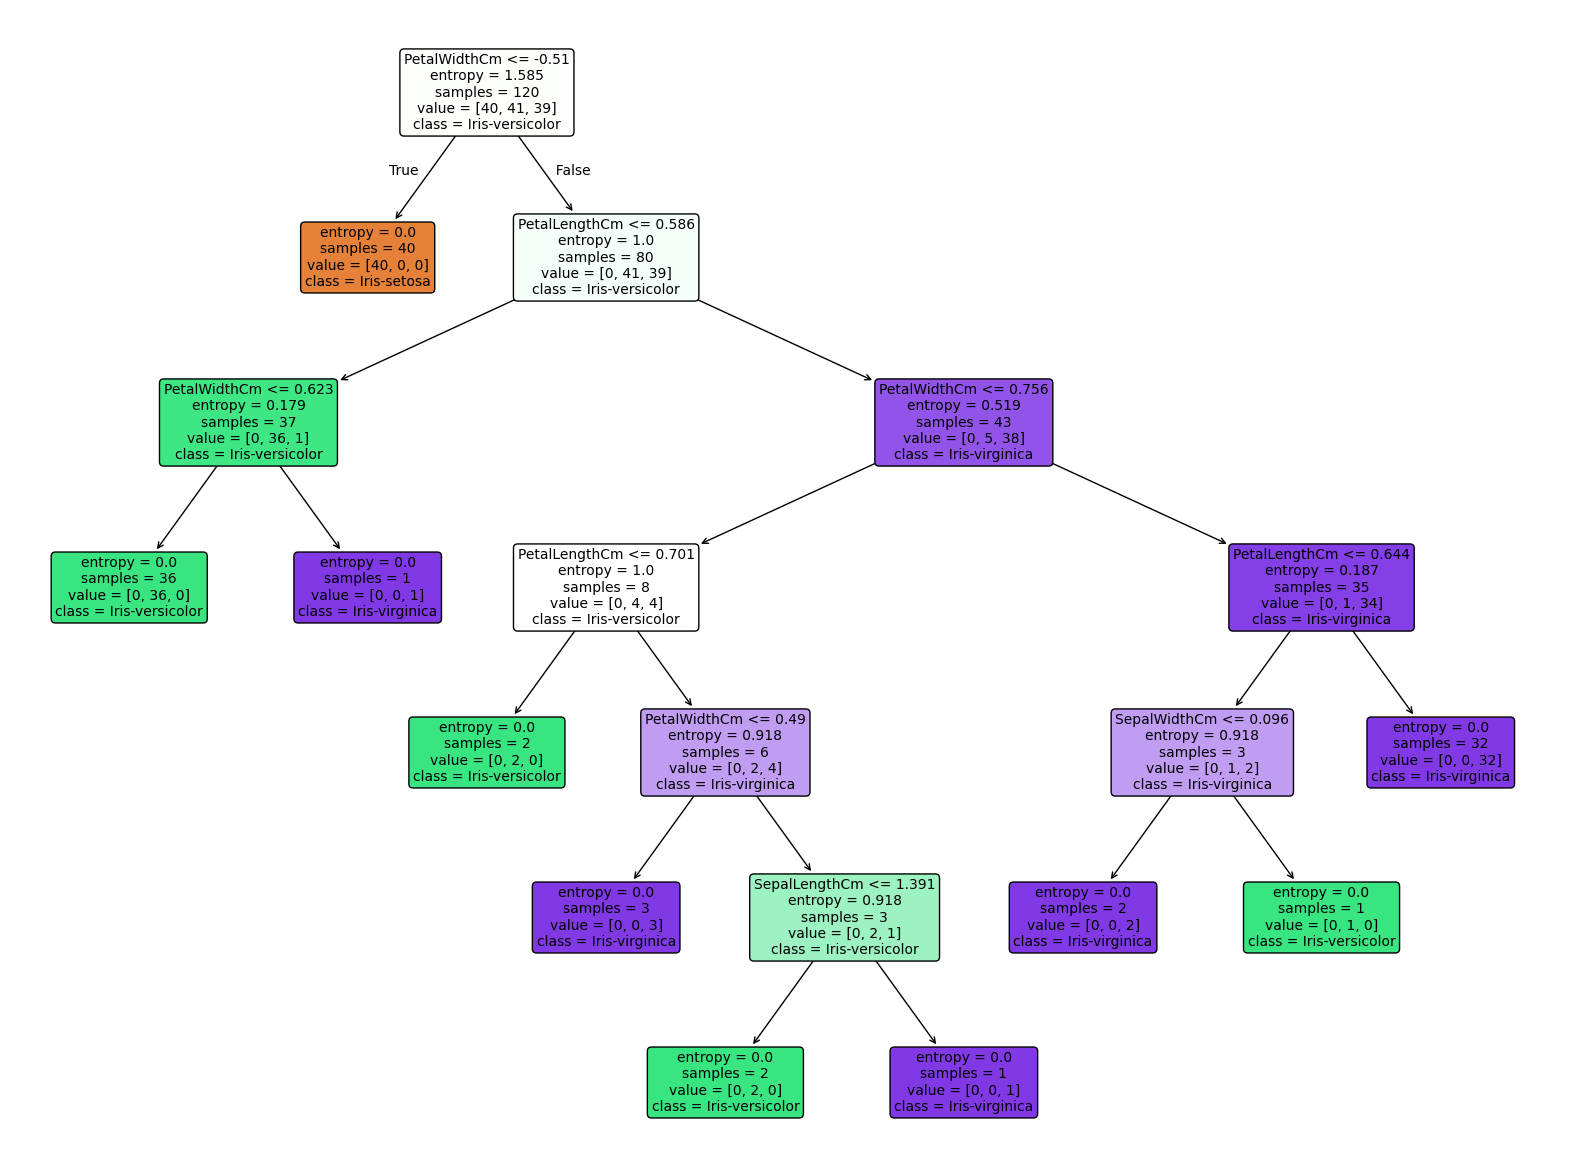

In [46]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 15))  # Adjust figure size
plot_tree(dtc, 
          feature_names=df.columns[:-1],
          class_names=df['Species'].unique(), 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()